In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
data = pd.read_csv("fer2013.csv")

In [5]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
data['pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
35882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883    178 174 172 173 181 188 191 194 196 199 200 20...
35884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 35887, dtype: object

In [7]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [8]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

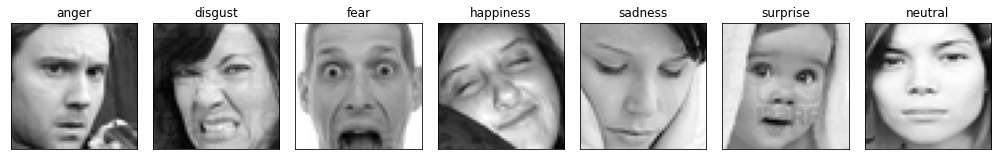

In [9]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(data.emotion.unique()):
    for j in range(1):
        px = data[data.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48,1).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px , cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [10]:
import time
begin = time.time()
k=[]
for px in data.pixels:
    px = np.array(px.split(' ')).reshape(48, 48,1).astype('float32')
    k.append(px)
    
end = time.time()

print("time taken =", end-begin)
    

time taken = 32.124499559402466


In [11]:
f=np.array(k)

In [12]:
f.shape

(35887, 48, 48, 1)

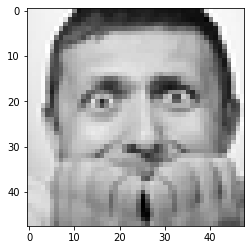

In [17]:
plt.imshow(f[300], cmap='gray')

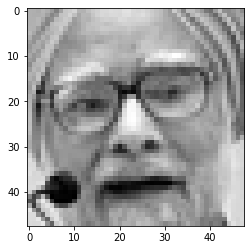

In [18]:
plt.imshow(f[1],cmap ='gray')

In [19]:
y= np.array(data.emotion)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(f, y, test_size=0.1, random_state=42)

In [21]:
X_train.shape

(32298, 48, 48, 1)

In [22]:
X_test.shape

(3589, 48, 48, 1)

In [23]:
X_test.shape

(3589, 48, 48, 1)

In [24]:
y_train = tf.keras.utils.to_categorical(y_train, 7) 
y_test = tf.keras.utils.to_categorical(y_test, 7)

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


In [27]:
input_shape = (48,48,1)

In [28]:
model = Sequential()
model.add(Conv2D(64,(5,5),input_shape = input_shape))
#model.add(Conv2D(64,(5,5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(5,5),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))




In [29]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 18, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         2

In [30]:
training = model.fit(X_train,y_train,epochs=20, validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/20
1010/1010 [==============================] - 41s 8ms/step - loss: 1.8645 - accuracy: 0.3177 - val_loss: 1.7655 - val_accuracy: 0.2828
Epoch 2/20
1010/1010 [==============================] - 8s 8ms/step - loss: 1.3343 - accuracy: 0.4914 - val_loss: 1.9481 - val_accuracy: 0.2519
Epoch 3/20
1010/1010 [==============================] - 8s 8ms/step - loss: 1.1943 - accuracy: 0.5523 - val_loss: 1.5048 - val_accuracy: 0.4528
Epoch 4/20
1010/1010 [==============================] - 8s 8ms/step - loss: 1.1102 - accuracy: 0.5806 - val_loss: 1.2682 - val_accuracy: 0.5157
Epoch 5/20
1010/1010 [==============================] - 8s 8ms/step - loss: 1.0060 - accuracy: 0.6238 - val_loss: 1.2149 - val_accuracy: 0.5475
Epoch 6/20
1010/1010 [==============================] - 8s 8ms/step - loss: 0.9000 - accuracy: 0.6706 - val_loss: 1.3117 - val_accuracy: 0.5143
Epoch 7/20
1010/1010 [==============================] - 8s 8ms/step - loss: 0.8272 - accuracy: 0.6913 - val_loss: 1.3141 - val_accuracy

In [48]:
pred = f[100].reshape(1,48,48,1)

In [46]:
model.predict_classes(pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

In [55]:
emotion_label_to_text[np.argmax(model.predict(pred), axis=-1)[0]]

'happiness'

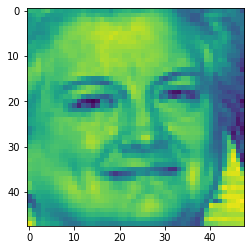

In [56]:
plt.imshow(pred[0])

20 epochs and the above parameters are best.